# Fingerprint Recognition

In [1]:
# Import necessary libraries
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
# Define the path to the sample fingerprint image
sample_path = "Real/1__M_Left_ring_finger_Obl.BMP"
sample = cv2.imread(sample_path)

In [3]:
# Initialize variables to store the best matching result
best_score = 0
best_filename = None
best_image = None
best_kp1 = None
best_kp2 = None
best_mp = None

In [6]:
# Define the directory containing real fingerprint images
real_images_dir = "Real"

In [7]:
# Loop through each real fingerprint image in the directory
for counter, file in enumerate(os.listdir(real_images_dir)):
    if counter % 10 == 0:
        print("Processing image", counter)

    fingerprint_path = os.path.join(real_images_dir, file)
    fingerprint_img = cv2.imread(fingerprint_path)

    # Check if the image could not be loaded
    if fingerprint_img is None:
        print("Error loading:", fingerprint_path)
        continue

    # Create a SIFT detector
    sift = cv2.SIFT_create()

    # Detect keypoints and compute descriptors for the sample and real fingerprint images
    keypoints_1, des1 = sift.detectAndCompute(sample, None)
    keypoints_2, des2 = sift.detectAndCompute(fingerprint_img, None)

    # Check if keypoint detection failed for either image
    if keypoints_1 is None or keypoints_2 is None:
        print("Keypoint detection failed for", fingerprint_path)
        continue

    # Create a FLANN-based matcher for keypoint matching
    matcher = cv2.FlannBasedMatcher({"algorithm": 1, "trees": 10}, {})
    matches = matcher.knnMatch(des1, des2, k=2)

    # Filter good matches based on Lowe's ratio test
    match_points = [p for p, q in matches if p.distance < 0.1 * q.distance]

    # Calculate a matching score as the ratio of good matches to total keypoints
    keypoints = min(len(keypoints_1), len(keypoints_2))
    score = len(match_points) / keypoints * 100

    # Update the best matching result if the current score is higher
    if score > best_score:
        best_score = score
        best_filename = file
        best_image = fingerprint_img
        best_kp1, best_kp2, best_mp = keypoints_1, keypoints_2, match_points


Processing image 0
Processing image 10
Processing image 20
Processing image 30
Processing image 40
Processing image 50
Processing image 60
Processing image 70
Processing image 80
Processing image 90
Processing image 100
Processing image 110
Processing image 120
Processing image 130
Processing image 140
Processing image 150
Processing image 160
Processing image 170
Processing image 180
Processing image 190
Processing image 200
Processing image 210
Processing image 220
Processing image 230
Processing image 240
Processing image 250
Processing image 260
Processing image 270
Processing image 280
Processing image 290
Processing image 300
Processing image 310
Processing image 320
Processing image 330
Processing image 340
Processing image 350
Processing image 360
Processing image 370
Processing image 380
Processing image 390
Processing image 400
Processing image 410
Processing image 420
Processing image 430
Processing image 440
Processing image 450
Processing image 460
Processing image 470
Pro

Processing image 3790
Processing image 3800
Processing image 3810
Processing image 3820
Processing image 3830
Processing image 3840
Processing image 3850
Processing image 3860
Processing image 3870
Processing image 3880
Processing image 3890
Processing image 3900
Processing image 3910
Processing image 3920
Processing image 3930
Processing image 3940
Processing image 3950
Processing image 3960
Processing image 3970
Processing image 3980
Processing image 3990
Processing image 4000
Processing image 4010
Processing image 4020
Processing image 4030
Processing image 4040
Processing image 4050
Processing image 4060
Processing image 4070
Processing image 4080
Processing image 4090
Processing image 4100
Processing image 4110
Processing image 4120
Processing image 4130
Processing image 4140
Processing image 4150
Processing image 4160
Processing image 4170
Processing image 4180
Processing image 4190
Processing image 4200
Processing image 4210
Processing image 4220
Processing image 4230
Processing

Best match: 1__M_Right_ring_finger.BMP
Best score: 100.0


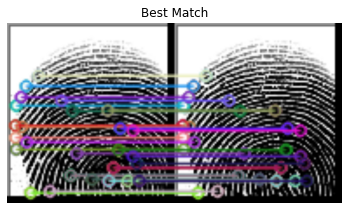

In [8]:
# Print the best match filename and score
print("Best match:", best_filename)
print("Best score:", best_score)

# Display the best match result if it exists
if best_mp:
    result = cv2.drawMatches(sample, best_kp1, best_image, best_kp2, best_mp, None)
    result = cv2.resize(result, None, fx=5, fy=5)
    image = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title("Best Match")
    plt.axis("off")
    plt.show()

# Optionally, you can save the best match result as an image
if best_filename:
    cv2.imwrite("best_match_result.jpg", best_image)